In [1]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# View all of the classes that automap found
session = Session(engine)
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
m_table_first = session.query(measurement).first()
m_table_first.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d4084987f0>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1}

In [10]:
s_table_first = session.query(station).first()
s_table_first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d408498f28>,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0}

# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
from sqlalchemy import desc
last_date =session.query(measurement.date).order_by(desc(measurement.date)).first()
last_date

('2017-08-23')

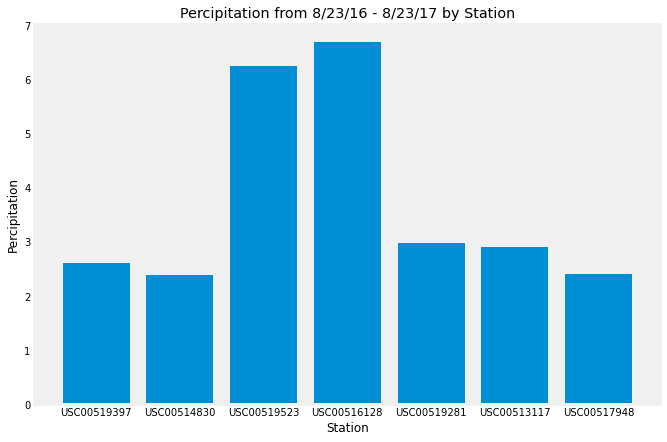

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last12 = session.query(measurement.date,measurement.id, measurement.prcp, measurement.station, measurement.tobs).filter\
(measurement.date >= '2016-08-23').order_by\
(desc(measurement.date)).all()

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
last12_df = pd.DataFrame(last12)
plt.figure(figsize = (10,7))
plt.bar(last12_df['station'], last12_df['prcp'])
plt.xlabel("Station")
plt.ylabel("Percipitation")
plt.title("Percipitation from 8/23/16 - 8/23/17 by Station")
plt.grid()
plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last12_df.describe()

,id,prcp,tobs
count,2230.000000,2021.000000,2230.000000
mean,10158.570404,0.177279,74.590583
std,5603.500203,0.461190,4.611667
min,2364.000000,0.000000,58.000000
25%,5287.250000,0.000000,72.000000
50%,8930.500000,0.020000,75.000000
75%,14750.750000,0.130000,78.000000
max,19550.000000,6.700000,87.000000


# Exploratory Station Analysis

In [25]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(func.count(station.station)).all()
num_stations

[(9)]

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [18]:
# Close Session
session.close()